In [1]:
import pandas as pd 
import matplotlib as plt

In [2]:
df = pd.read_csv('/workspaces/bayer_uc/clinical_trial_with_target.csv')

In [3]:
df.head()

,nct_id,phase,condition,intervention_type,study_design,sponsor_type,enrollment,status,gender,min_age,max_age,location,start_date,completion_date,results,p_value,final_status
0,NCT000006201,PHASE3,Hypercholesterolemia,DRUG,RANDOMIZED,NIH,10251.0,COMPLETED,ALL,40 Years,79 Years,Canada,1999-09-30,2012-12-31,Glycemia Trial: Standard Control/Lipid Trial: ...,0.020,success
1,NCT000004091,PHASE4,Spondylolisthesis,OTHER,RANDOMIZED,NIH,304.0,COMPLETED,ALL,18 Years,NaN,United States,2000-03-31,2015-04-30,No result,NaN,fail
2,NCT000006202,PHASE3,Hypercholesterolemia,DRUG,RANDOMIZED,FED,10251.0,COMPLETED,ALL,40 Years,79 Years,United States,1999-09-30,2012-12-31,Glycemia Trial: Standard Control,0.320,fail
3,NCT000025971,PHASE3,Prostate Cancer,DRUG,RANDOMIZED,NIH,2028.0,COMPLETED,MALE,18 Years,NaN,United States,1994-10-31,2018-05-14,Radiation Therapy Alone,0.001,success
4,NCT000006203,PHASE3,Cardiovascular Diseases,DRUG,RANDOMIZED,NIH,10251.0,COMPLETED,ALL,40 Years,79 Years,United States,1999-09-30,2012-12-31,Glycemia Trial: Intensive Control,0.320,fail


In [4]:
df.nunique()

nct_id               130000
phase                     6
condition               240
intervention_type         7
study_design              2
sponsor_type              6
enrollment              107
status                    1
gender                    3
min_age                  42
max_age                  64
location                  2
start_date              196
completion_date         203
results                  52
p_value                  14
final_status              2
dtype: int64

In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"{col}: {values[:10]}{' ...' if len(values) > 10 else ''}")  # show first 10 unique values for brevity

nct_id: ['NCT000006201' 'NCT000004091' 'NCT000006202' 'NCT000025971'
 'NCT000006203' 'NCT000006204' 'NCT000006205' 'NCT000002591'
 'NCT000006206' 'NCT000006207'] ...
phase: ['PHASE3' 'PHASE4' nan 'PHASE2' 'PHASE2/PHASE3' 'PHASE1' 'PHASE1/PHASE2']
condition: ['Hypercholesterolemia' 'Spondylolisthesis' 'Prostate Cancer'
 'Cardiovascular Diseases' 'Coronary Disease'
 'Substance-Related Disorders' 'Hypertension' 'Diabetes Mellitus, Type 2'
 'Atherosclerosis' 'Acquired Immunodeficiency Syndrome'] ...
intervention_type: ['DRUG' 'OTHER' 'PROCEDURE' 'BEHAVIORAL' 'DIETARY_SUPPLEMENT' 'DEVICE' nan
 'BIOLOGICAL']
study_design: ['RANDOMIZED' 'NON_RANDOMIZED' nan]
sponsor_type: ['NIH' 'FED' 'OTHER' 'UNKNOWN' 'INDUSTRY' 'NETWORK']
enrollment: [1.0251e+04 3.0400e+02 2.0280e+03 1.2000e+01 2.7900e+02 3.9876e+04
        nan 6.1000e+01 2.3400e+02 2.0000e+02] ...
status: ['COMPLETED']
gender: ['ALL' 'MALE' 'FEMALE']
min_age: ['40 Years' '18 Years' '21 Years' '45 Years' '13 Years' '55 Years'
 '12 Years' '6

In [6]:
# Check the number of NaN/null values in each column
null_counts = df.isnull().sum()
print(null_counts)

nct_id                   0
phase                  445
condition                0
intervention_type      123
study_design           963
sponsor_type             0
enrollment            3731
status                   0
gender                   0
min_age                296
max_age              29652
location              7103
start_date             651
completion_date        896
results                  0
p_value              11268
final_status             0
dtype: int64


In [7]:
df = df.dropna(subset=['p_value',])

In [8]:
null_counts = df.isnull().sum()
print(null_counts)

nct_id                   0
phase                    0
condition                0
intervention_type        0
study_design            16
sponsor_type             0
enrollment               0
status                   0
gender                   0
min_age                  0
max_age              23013
location                 0
start_date               0
completion_date          0
results                  0
p_value                  0
final_status             0
dtype: int64


In [9]:
df['study_design'].value_counts()

study_design
RANDOMIZED    118716
Name: count, dtype: int64

we will remove 'study_design' column

In [42]:
df['intervention_type'].value_counts()

intervention_type
DRUG    118732
Name: count, dtype: int64

In [ ]:
df['final_status'].value_counts()

final_status
fail       59150
success    36569
Name: count, dtype: int64

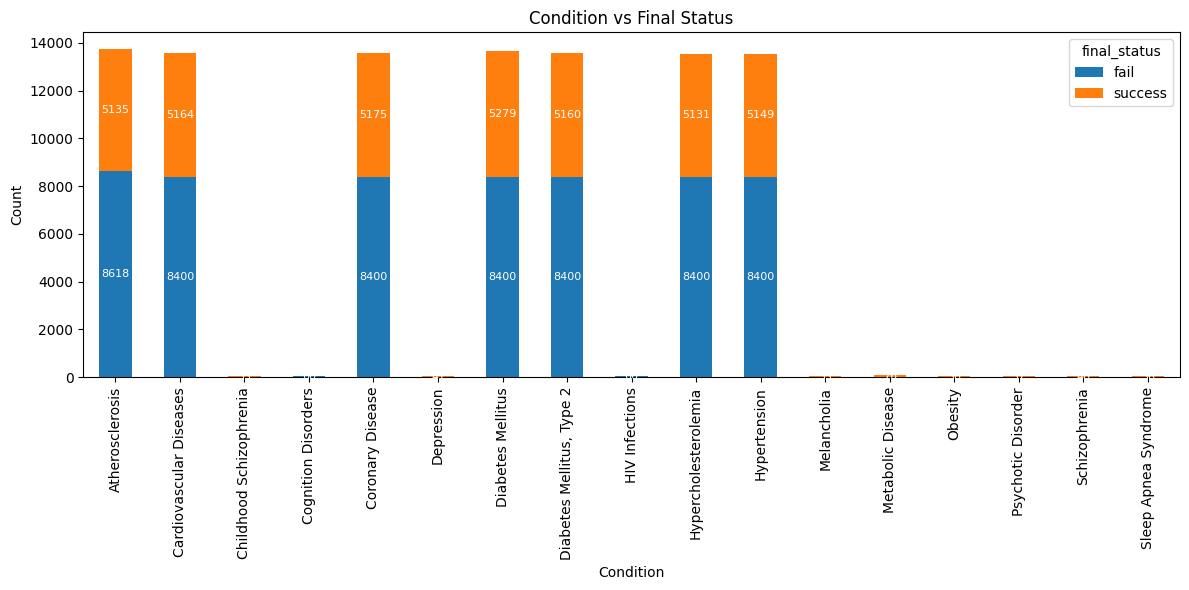

In [18]:
ax = condition_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.pyplot.xlabel('Condition')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Condition vs Final Status')
plt.pyplot.legend(title=col)
plt.pyplot.tight_layout()

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=8, color='white')

plt.pyplot.show()

In [19]:
condition_counts = df['condition'].value_counts()
print(condition_counts)

condition
Atherosclerosis              13753
Diabetes Mellitus            13679
Coronary Disease             13575
Cardiovascular Diseases      13564
Diabetes Mellitus, Type 2    13560
Hypertension                 13549
Hypercholesterolemia         13531
Metabolic Disease               76
Cognition Disorders             66
HIV Infections                  66
Obesity                         58
Sleep Apnea Syndrome            56
Depression                      41
Schizophrenia                   40
Psychotic Disorder              37
Melancholia                     35
Childhood Schizophrenia         33
Name: count, dtype: int64


we can make a seperate category as other for the rest of the conditions with low statistics

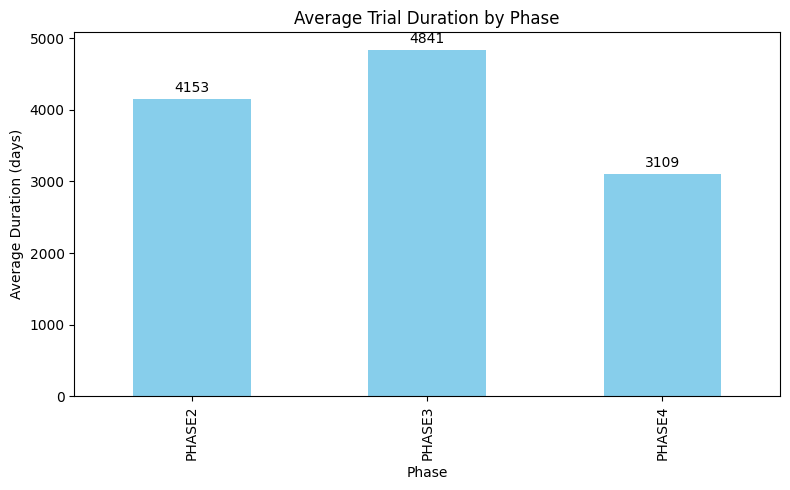

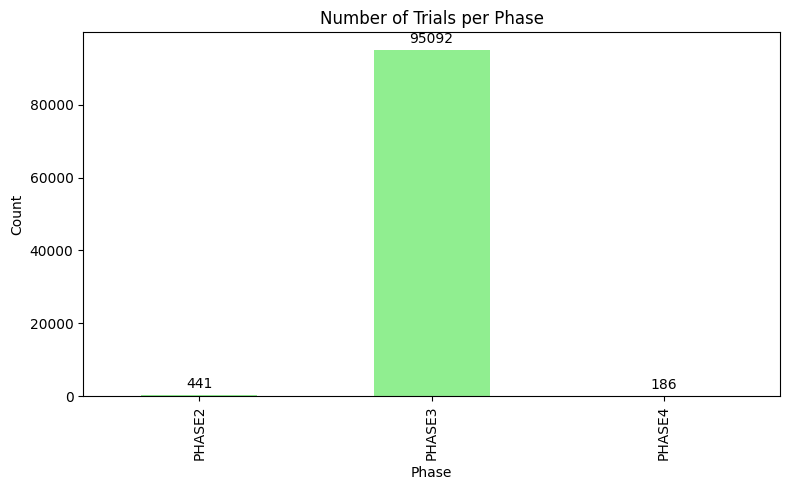

In [22]:
import matplotlib.pyplot as plt

# Bar plot for average duration per phase
phase_duration = df.groupby('phase')['duration_days'].mean().sort_index()
ax1 = phase_duration.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Trial Duration by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Duration (days)')

# Annotate values on bars
for i, v in enumerate(phase_duration):
    ax1.text(i, v + 50, f'{int(v)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Bar plot for number of trials per phase
phase_counts = df['phase'].value_counts().sort_index()
ax2 = phase_counts.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('Number of Trials per Phase')
plt.xlabel('Phase')
plt.ylabel('Count')

# Annotate values on bars
for i, v in enumerate(phase_counts):
    ax2.text(i, v + max(phase_counts)*0.01, f'{int(v)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
# Calculate percentage of successful trials for each phase
phase_success_pct = df.groupby('phase')['final_status'].value_counts(normalize=True).unstack().fillna(0)
phase_success_pct['success_pct'] = phase_success_pct['success'] * 100
print(phase_success_pct['success_pct'])

phase
PHASE2     71.115974
PHASE3     50.022441
PHASE4    100.000000
Name: success_pct, dtype: float64


In [46]:
# Count of successful trials for each phase
phase_success_count = df[df['final_status'] == 'success'].groupby('phase').size()
print(phase_success_count)

phase
PHASE2      325
PHASE3    59071
PHASE4      186
dtype: int64


In [48]:
df['phase'].value_counts()

phase
PHASE3    118089
PHASE2       457
PHASE4       186
Name: count, dtype: int64

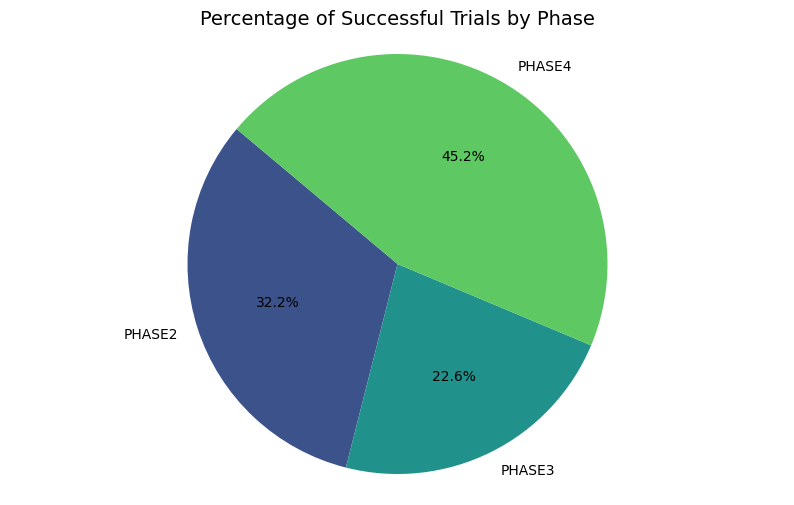

Number of successful trials for each phase:


phase
PHASE3    118089
PHASE2       457
PHASE4       186
Name: count, dtype: int64

In [52]:
import seaborn as sns
# Pie chart for percentage of successful trials by Phase
phase_percentage = df.groupby('phase')['final_status'].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(10, 6))
# Pie chart for percentage of successful trials by Phase
success_phase_percentage = phase_percentage['success'].dropna()
plt.pie(success_phase_percentage, labels=success_phase_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(success_phase_percentage)))
plt.axis('equal')
plt.title('Percentage of Successful Trials by Phase', fontsize=14)

plt.show()
print('Number of successful trials for each phase:')
df['phase'].value_counts()

In [54]:
print(df.columns)

Index(['nct_id', 'phase', 'condition', 'intervention_type', 'study_design',
       'sponsor_type', 'enrollment', 'status', 'gender', 'min_age', 'max_age',
       'location', 'start_date', 'completion_date', 'results', 'p_value',
       'final_status'],
      dtype='object')


non-relevent columns:- 

1. nct_id                           
2. intervention_type (has only durg only one unique value )
3. study_design      ()
4. status            ()
5. gender            ()
6. min_age           ()
7. max_age           ()
8. location          () 
9. start_date             
10. completion_date          
11. results                  
12. p_value              


training variables left:-

1. phase
2. condition
3. sponser_type
4. enrollment
5. location
6. time frame (start_date - end_date(in years))




In [55]:
# Calculate trial period in years from start_date and completion_date
df['trial_period'] = (
    pd.to_datetime(df['completion_date']) - pd.to_datetime(df['start_date'])
).dt.days / 365.25

In [56]:
df.head()

,nct_id,phase,condition,intervention_type,study_design,sponsor_type,enrollment,status,gender,min_age,max_age,location,start_date,completion_date,results,p_value,final_status,trial_period
0,NCT000006201,PHASE3,Hypercholesterolemia,DRUG,RANDOMIZED,NIH,10251.0,COMPLETED,ALL,40 Years,79 Years,Canada,1999-09-30,2012-12-31,Glycemia Trial: Standard Control/Lipid Trial: ...,0.020,success,13.253936
2,NCT000006202,PHASE3,Hypercholesterolemia,DRUG,RANDOMIZED,FED,10251.0,COMPLETED,ALL,40 Years,79 Years,United States,1999-09-30,2012-12-31,Glycemia Trial: Standard Control,0.320,fail,13.253936
3,NCT000025971,PHASE3,Prostate Cancer,DRUG,RANDOMIZED,NIH,2028.0,COMPLETED,MALE,18 Years,NaN,United States,1994-10-31,2018-05-14,Radiation Therapy Alone,0.001,success,23.534565
4,NCT000006203,PHASE3,Cardiovascular Diseases,DRUG,RANDOMIZED,NIH,10251.0,COMPLETED,ALL,40 Years,79 Years,United States,1999-09-30,2012-12-31,Glycemia Trial: Intensive Control,0.320,fail,13.253936
5,NCT000006204,PHASE3,Coronary Disease,DRUG,RANDOMIZED,NIH,10251.0,COMPLETED,ALL,40 Years,79 Years,United States,1999-09-30,2012-12-31,Glycemia Trial: Standard Control,0.120,fail,13.253936


In [57]:
print(df.dtypes)

nct_id                object
phase                 object
condition             object
intervention_type     object
study_design          object
sponsor_type          object
enrollment           float64
status                object
gender                object
min_age               object
max_age               object
location              object
start_date            object
completion_date       object
results               object
p_value              float64
final_status          object
trial_period         float64
dtype: object


In [58]:
print(f"Numner of successful trials\n{df['intervention_type'].value_counts()}\n\nTotal number of trials\n{df['intervention_type'].value_counts()}")

Numner of successful trials
intervention_type
DRUG    118732
Name: count, dtype: int64

Total number of trials
intervention_type
DRUG    118732
Name: count, dtype: int64


In [ ]:
cols_to_drop = [
    'nct_id', 'intervention_type', 'study_design', 'status', 'gender',
    'min_age', 'max_age', 'location', 'start_date', 'completion_date',
    'results', 'p_value'
]
df = df.drop(columns=cols_to_drop)
df.head()